### Install ini terlebih dahulu

In [ ]:
!pip install tradingWithPython

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import requests # interaction with the web
import os  #  file system operations
import yaml # human-friendly data format
import re  # regular expressions
import pandas as pd # pandas... the best time series library out there
import datetime as dt # date and time functions
import io 
import time

## Ambil Cookie yahoo dan token

Cookie ini diperlukan untuk download dan bisa digunakan setahun


In [4]:
# search with regular expressions

# "CrumbStore":\{"crumb":"(?<crumb>[^"]+)"\}

url = 'https://uk.finance.yahoo.com/quote/AAPL/history' # url for a ticker symbol, with a download link
r = requests.get(url)  # download page

txt = r.text # extract html


cookie = r.cookies['B'] # the cooke we're looking for is named 'B'
print('Cookie: ', cookie)

# Now we need to extract the token from html. 
# the string we need looks like this: "CrumbStore":{"crumb":"lQHxbbYOBCq"}
# regular expressions will do the trick!

pattern = re.compile('.*"CrumbStore":\{"crumb":"(?P<crumb>[^"]+)"\}')

for line in txt.splitlines():
    m = pattern.match(line)
    if m is not None:
        crumb = m.groupdict()['crumb']
        
        
print('Crumb=',crumb)

Cookie:  7q7bnt9en0jjf&b=3&s=le
Crumb= ghV0iGtpmds


In [5]:
# create data directory in the user folder
dataDir = os.path.expanduser('~')+'/twpData'

if not os.path.exists(dataDir):
    os.mkdir(dataDir)


# save data to YAML file
data = {'cookie':cookie,'crumb':crumb}

dataFile = os.path.join(dataDir,'yahoo_cookie.yml')

with open(dataFile,'w') as fid:
    yaml.dump(data,fid)

## Masukin tanggal mulai dan tanggal akhir

menggunakan timestamp()

`https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1463754366&period2=1495290366&interval=1d&events=history&crumb=DB/mJy8XKWr`

In [6]:
# start with tuples ...
sDate = (2001,1,1)
eDate = (2010,4,21)
sq = 'WOMF.JK'
 
dt.datetime(*sDate).timestamp() # convert to seconds since epoch


978282000.0

## Ambil data

Percobaan ambil data

In [7]:
# prepare input data as a tuple
data = (int(dt.datetime(*sDate).timestamp()),
        int(dt.datetime.now().timestamp()), 
        crumb)


url = "https://query1.finance.yahoo.com/v7/finance/download/{3}?period1={0}&period2={1}&interval=1d&events=history&crumb={2}".format(*data,sq)


print(url)
data = requests.get(url, cookies={'B':cookie})

https://query1.finance.yahoo.com/v7/finance/download/WOMF.JK?period1=978282000&period2=1567641208&interval=1d&events=history&crumb=ghV0iGtpmds


In [8]:
buf = io.StringIO(data.text) # create a buffer
df = pd.read_csv(buf,index_col=0) # convert to pandas DataFrame
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-13,604.101013,623.588013,565.127014,584.614014,440.982635,45490933.0
2004-12-14,584.614014,584.614014,545.640015,565.127014,426.283325,13802062.0
2004-12-15,565.127014,584.614014,565.127014,584.614014,440.982635,11438322.0
2004-12-16,584.614014,604.101013,584.614014,604.101013,455.681946,62767084.0
2004-12-17,604.101013,623.588013,604.101013,623.588013,470.381256,31810106.0


## Buat fungsi untuk men-mendownload lebih banyak

In [16]:
def download_stock(stock):
    # start with tuples ...
    sDate = (2001,1,1)
    eDate = (2019,9,1)
    sq = stock
    path='./stock/'
 
    dt.datetime(*sDate).timestamp() # convert to seconds since epoch
    

    # prepare input data as a tuple
    data = (int(dt.datetime(*sDate).timestamp()),
            int(dt.datetime(*eDate).timestamp()), 
            crumb)


    url = "https://query1.finance.yahoo.com/v7/finance/download/{3}?period1={0}&period2={1}&interval=1d&events=history&crumb={2}".format(*data,sq)

    try:
        data = requests.get(url, cookies={'B':cookie})
        buf = io.StringIO(data.text) # create a buffer
        df = pd.read_csv(buf,index_col=0) # convert to pandas DataFrame
        df.to_csv(path+sq+".csv")
        print(sq," downloaded")
    except:
        print("Error reading/writing: ",sq)
        
    time.sleep(2)


In [17]:
# kompilasi list
lst = pd.read_csv('all_list.csv')
slist = list(lst['Kode']+".JK")

In [18]:
## list yang akan didownload
slist

['AALI.JK',
 'ABBA.JK',
 'ABDA.JK',
 'ABMM.JK',
 'ACES.JK',
 'ACST.JK',
 'ADES.JK',
 'ADHI.JK',
 'ADMF.JK',
 'ADMG.JK',
 'ADRO.JK',
 'AGII.JK',
 'AGRO.JK',
 'AGRS.JK',
 'AHAP.JK',
 'AIMS.JK',
 'AISA.JK',
 'AKKU.JK',
 'AKPI.JK',
 'AKRA.JK',
 'AKSI.JK',
 'ALDO.JK',
 'ALKA.JK',
 'ALMI.JK',
 'ALTO.JK',
 'AMAG.JK',
 'AMFG.JK',
 'AMIN.JK',
 'AMRT.JK',
 'ANDI.JK',
 'ANJT.JK',
 'ANTM.JK',
 'APEX.JK',
 'APIC.JK',
 'APII.JK',
 'APLI.JK',
 'APLN.JK',
 'APOL.JK',
 'ARGO.JK',
 'ARII.JK',
 'ARMY.JK',
 'ARNA.JK',
 'ARTA.JK',
 'ARTI.JK',
 'ARTO.JK',
 'ASBI.JK',
 'ASDM.JK',
 'ASGR.JK',
 'ASII.JK',
 'ASJT.JK',
 'ASMI.JK',
 'ASRI.JK',
 'ASRM.JK',
 'ASSA.JK',
 'ATIC.JK',
 'ATPK.JK',
 'AUTO.JK',
 'BABP.JK',
 'BACA.JK',
 'BAJA.JK',
 'BALI.JK',
 'BAPA.JK',
 'BATA.JK',
 'BAYU.JK',
 'BBCA.JK',
 'BBHI.JK',
 'BBKP.JK',
 'BBLD.JK',
 'BBMD.JK',
 'BBNI.JK',
 'BBNP.JK',
 'BBRI.JK',
 'BBRM.JK',
 'BBTN.JK',
 'BBYB.JK',
 'BCAP.JK',
 'BCIC.JK',
 'BCIP.JK',
 'BDMN.JK',
 'BEKS.JK',
 'BELL.JK',
 'BEST.JK',
 'BFIN.JK',
 'BG

# Download all stocks

In [19]:
%%time
## MENDOWNLOAD SEMUA YANG ADA DI SLIST
for sl in slist:
    download_stock(sl)

AALI.JK  downloaded
ABBA.JK  downloaded
ABDA.JK  downloaded
ABMM.JK  downloaded
ACES.JK  downloaded
ACST.JK  downloaded
ADES.JK  downloaded
ADHI.JK  downloaded
ADMF.JK  downloaded
ADMG.JK  downloaded
ADRO.JK  downloaded
AGII.JK  downloaded
AGRO.JK  downloaded
AGRS.JK  downloaded
AHAP.JK  downloaded
AIMS.JK  downloaded
AISA.JK  downloaded
AKKU.JK  downloaded
AKPI.JK  downloaded
AKRA.JK  downloaded
AKSI.JK  downloaded
ALDO.JK  downloaded
ALKA.JK  downloaded
ALMI.JK  downloaded
ALTO.JK  downloaded
AMAG.JK  downloaded
AMFG.JK  downloaded
AMIN.JK  downloaded
AMRT.JK  downloaded
ANDI.JK  downloaded
ANJT.JK  downloaded
ANTM.JK  downloaded
APEX.JK  downloaded
APIC.JK  downloaded
APII.JK  downloaded
APLI.JK  downloaded
APLN.JK  downloaded
APOL.JK  downloaded
ARGO.JK  downloaded
ARII.JK  downloaded
ARMY.JK  downloaded
ARNA.JK  downloaded
ARTA.JK  downloaded
ARTI.JK  downloaded
ARTO.JK  downloaded
ASBI.JK  downloaded
ASDM.JK  downloaded
ASGR.JK  downloaded
ASII.JK  downloaded
ASJT.JK  downloaded


MYRX.JK  downloaded
MYTX.JK  downloaded
NAGA.JK  downloaded
NASA.JK  downloaded
NELY.JK  downloaded
NFCX.JK  downloaded
NICK.JK  downloaded
NIKL.JK  downloaded
NIPS.JK  downloaded
NIRO.JK  downloaded
NISP.JK  downloaded
NOBU.JK  downloaded
NRCA.JK  downloaded
NUSA.JK  downloaded
OASA.JK  downloaded
OCAP.JK  downloaded
OKAS.JK  downloaded
OMRE.JK  downloaded
PADI.JK  downloaded
PALM.JK  downloaded
PANI.JK  downloaded
PANR.JK  downloaded
PANS.JK  downloaded
PBID.JK  downloaded
PBRX.JK  downloaded
PBSA.JK  downloaded
PCAR.JK  downloaded
PDES.JK  downloaded
PEGE.JK  downloaded
PGAS.JK  downloaded
PGLI.JK  downloaded
PICO.JK  downloaded
PJAA.JK  downloaded
PKPK.JK  downloaded
PLAS.JK  downloaded
PLIN.JK  downloaded
PNBN.JK  downloaded
PNBS.JK  downloaded
PNIN.JK  downloaded
PNLF.JK  downloaded
PNSE.JK  downloaded
POLA.JK  downloaded
POLL.JK  downloaded
POLY.JK  downloaded
POOL.JK  downloaded
PORT.JK  downloaded
POWR.JK  downloaded
PPRE.JK  downloaded
PPRO.JK  downloaded
PRAS.JK  downloaded


## CHECK PEMENANG TERAKHIR - TOP GAIN -  DARI SAHAM

In [20]:
import glob
sl = glob.glob('./stock/*.csv')

In [21]:
sql = []
for i in sl:
    df = pd.read_csv(i)
    
    try:
        dlast = df.iloc[-1]['Close']
        dprev = df.iloc[-2]['Close']

        if (dlast>dprev*1.2):
            print(i)
            sql.append(i)
    except:
        pass

./stock\EMDE.JK.csv
./stock\PEGE.JK.csv
./stock\PICO.JK.csv


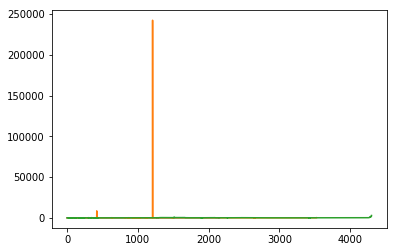

In [22]:
for i in sql:
    stk = pd.read_csv(i)
    stk['Close'].plot()

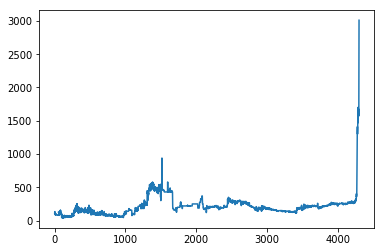

In [23]:
stk['Close'].plot()

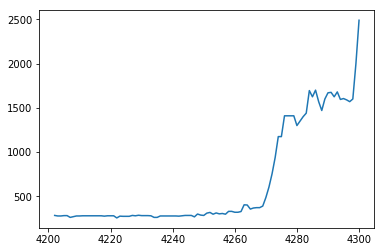

In [24]:
stk.iloc[-100:-1]['Close'].plot()